# Relatorio final - Anna Carolina; Beatriz Vitorio; Gabrielly Silva

# Introdução:

    A música é uma expressão de arte bem conhecida e apreciada por muitos. Com tantos gêneros e formas diferentes, gera interesse acerca de seus padrões em uma das maiores plataformas de streaming atual, o Spotify.

    Por isso, com o intuito de analisar, interpretar e tirar conclusões sobre dados das músicas mais ouvidas do spotify, delimitamos algumas perguntas que seriam possivels de responder utilizando um grande acervo de informações de livre acesso encontradas no Kaggle e Github, possibilitando assim uma melhor visualização e compreensão dos resultados.

# Dados usados:

Os datasets utilizados foram:

Hits do Spotify entre os anos 2000 e 2019, https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

    Dados dos "Hits" do spotify entre os anos mencionados, com os tópicos: 'Artista', 'Duração da música','Explicita', 'Ano', 'Popularidade', 'Dançabilidade', 'Energia', 'Volume', 'Speechiness'(O quanto tem palavras),'Acousticidade', 'Instrumentalness', 'Liveness', 'Tempo', 'Genero'.


Top 50 músicas do Spotify de 2010 a 2019, https://gist.github.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893

    Dados dos "Top 50" de músicas do Spotify entre os anos mencionados. Contem 14 tópicos, dos quais utilizamos: 'Título', 'Artista', 'Genero', 'Ano', 'BPM' (Batidas por minuto), 'Energia', 'Dançabilidade', 'Liveness', 'Duração', 'Acousticidade' e 'Popularidade'.


Músicas mais escutadas no Spotify em 2020, https://github.com/oyeoyeleye/Spotify-Song-Analysis-Classification/blob/main/Spotify2020.csv

    Apenas do ano de 2020, utilizamos os tópicos: 'Nome do artista','Popularidade','Nome da música', 'Acousticidade', 'Dançabilidade','Duração', 'Energia','Instrumentalness', 'Liveness', 'Volume', 'Speechiness'(O quanto tem palavras), 'Tempo'.

Os tópicos são bem parecidos entre si, para fins de compará-los. Inicialmente procuramos no Kaggle e Github alguns datasets que possuissem um grande acervo de informações e respondessem as nossas possíveis dúvidas sobre essa análise. Ao pegar de fontes diferentes, é possível obter e comparar os valores resultantes.

# Pré-processamento

-Importamos a biblioteca "pandas" no jupyter notebook e os datasets, após isso delimitamos as colunas apenas nas informações necessárias que iríamos utilizar para responder as perguntas.

-Importamos o seaborn e o matplotlib.pyplot.

-Teste do dataframe e identificação dos valores nulos para contar quantos haviam em cada coluna para assim lidar com eles antes e não houvesse a possibilidade de um dado nulo atrapalhar a analise.

-Remoção das colunas que não necessitaria e otimizei os nomes das remanescentes para facilitar o manuseio.
verifiquei o tipo dos dados de cada coluna para caso fosse necessário depois.


### Código:

In [1]:
import pandas as pd
url = 'https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv'
df_songs = pd.read_csv(url)

In [2]:
pd.isnull(df_songs).sum()

title                                                                            0
artist                                                                           0
the genre of the track                                                           0
year                                                                             0
Beats.Per.Minute -The tempo of the song                                          0
Energy- The energy of a song - the higher the value, the more energtic           0
Danceability - The higher the value, the easier it is to dance to this song      0
Loudness/dB - The higher the value, the louder the song                          0
Liveness - The higher the value, the more likely the song is a live recording    0
Valence - The higher the value, the more positive mood for the song              0
Length - The duration of the song                                                0
Acousticness - The higher the value the more acoustic the song is                0
Spee

In [3]:
df_songs = df_songs[['title','artist','the genre of the track','year', 'Loudness/dB - The higher the value, the louder the song', 'Liveness - The higher the value, the more likely the song is a live recording', 'Length - The duration of the song', 'Popularity- The higher the value the more popular the song is']]
df_songs.columns = ['Name', 'Artist', 'Genre', 'Year on Top50', 'Volume/dB', 'Liveness', 'Length', 'Popularity']

In [4]:
pd.isnull(df_songs).sum() #Vendo se tem algum valor nulo

Name             0
Artist           0
Genre            0
Year on Top50    0
Volume/dB        0
Liveness         0
Length           0
Popularity       0
dtype: int64

In [ ]:
df_songs.dtypes #Verificando os tipos caso sejam necessarios depois

Name             object
Artist           object
Genre            object
Year on Top50     int64
Volume/dB         int64
Liveness          int64
Length            int64
Popularity        int64
dtype: object

# Perguntas - Anna

## Quanto a Liveness (O quanto as músicas são ou parecem ser cantadas ao vivo) das músicas mudou ao longo do tempo?

Resposta: 

Para isso, calculei a média das liveness dividida por ano e fiz uma tabela com essas informações. Nela, deu para se notar que, como esperado, a média decresceu aos poucos ao longo dos anos, tendo começado com 21.1 em 2010 e terminado com 15.1 em 2019.

In [5]:
import seaborn as sns
sns.set_palette('Set1')

live = df_songs.groupby('Year on Top50',as_index=False)['Liveness'].mean()
live

,Year on Top50,Liveness
0,2010,21.176471
1,2011,20.943396
2,2012,15.828571
3,2013,19.718310
4,2014,17.293103
5,2015,18.305263
6,2016,17.737500
7,2017,15.369231
8,2018,14.750000
9,2019,15.161290


[Text(0, 0.5, 'Liveness Rate'), Text(0.5, 0, 'Year')]

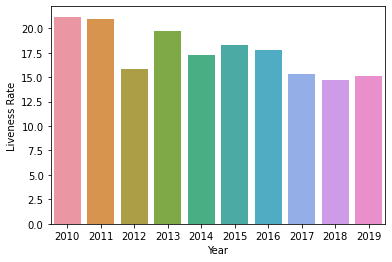

In [6]:
vis = sns.barplot(data=live, x='Year on Top50', y = 'Liveness') #Tabela de liveness (O quanto as músicas gravadas parecem com as ao vivo)
vis.set(xlabel='Year', ylabel='Liveness Rate')

## E quanto ao tamanho das músicas? Realmente diminuiu?

Resposta:

Essa foi um pouco mais complicada que a anterior. Primeiro, tirei a média por ano das durações. Depois fiz a moda delas, para ver quantas músicas tem a mesma duração. Para ter um parametro de checagem, fiz a mediana geral das durações também, e descobri que é de 221 segundos(por volta de 3minutos e meio).Por último, fiz uma tabela utilizando a moda e as durações, pela a biblioteca seaborn, para ter uma melhor visualização.

Para comparação, fiz um boxplot com a coluna de Liveness e os anos no Top50, logo após fiz com a Duração e usando novamente anos no Top50.

In [15]:
#Length - Tempo de duração da música
sns.set_palette('Set3')

length_y = df_songs.groupby('Year on Top50',as_index=False)['Length'].mean() #Media de duração por ano.
length_y

,Year on Top50,Length
0,2010,229.803922
1,2011,242.566038
2,2012,224.400000
3,2013,234.492958
4,2014,224.155172
5,2015,223.368421
6,2016,220.225000
7,2017,222.169231
8,2018,217.187500
9,2019,200.645161


In [16]:
#Length - Tempo da música
length_c = df_songs.groupby('Length',as_index=False)['Name'].count() #Moda
length_c

,Length,Name
0,134,1
1,148,1
2,157,1
3,158,1
4,159,2
...,...,...
139,353,1
140,354,1
141,379,1
142,403,1


In [17]:
length_m = df_songs.sort_values(by = 'Length').median() #Mediana
length_m

#A mediana de tamanho é 221 segundos.

<ipython-input-17-62d27d85881d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  length_m = df_songs.sort_values(by = 'Length').median() #Mediana


Year on Top50    2015.0
Volume/dB          -5.0
Liveness           12.0
Length            221.0
Popularity         69.0
dtype: float64

[Text(0, 0.5, 'Average Length'), Text(0.5, 0, 'Músicas')]

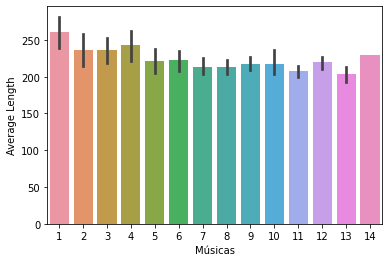

In [18]:
vis1 = sns.barplot(data=length_c, x='Name', y = 'Length')
vis1.set(xlabel='Músicas', ylabel='Average Length')

Aqui em cima, podemos ver que há uma maior quantidade de médias de duração das músicas ali entre 250 e 200 segundos, o que condiz com a mediana.

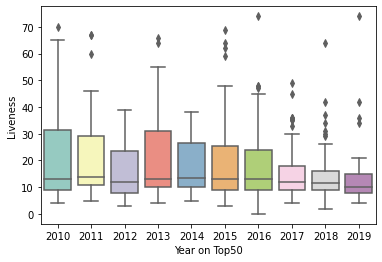

In [19]:
box = sns.boxplot(x = 'Year on Top50', y ='Liveness', data = df_songs)
box

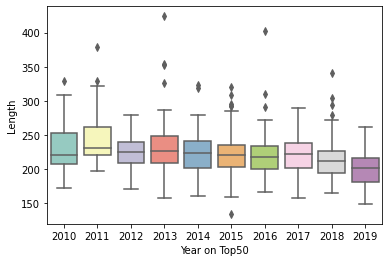

In [20]:
box1 = sns.boxplot(x = 'Year on Top50', y ='Length', data = df_songs)
box1

## Quais artistas tem as músicas mais longas? E mais curtas?

Resposta:

Criei uma variável com artistas e duração e utilizei "sort_values" para conseguir a moda dos dados. Os artistas com as músicas mais curtas no top50 são: Justin Bieber, R3HAB, Icona Pop, Lost Frequencies e Lizzo.

E as mais longas: Justin Timberlake(x2), Florence + The Machine, Kanye West e Daft Punk.

Agora, os com as médias das durações das músicas mais curtas no top 50 são: ZAYN, Zara Larsson, Zedd, fun., will.i.am, R3HAB, Icona Pop, Lost Frequencies, Lizzo, Charli XCX.

E as mais longas: Justin Timberlake, Daft Punk, T.I., Harry Styles, Kanye West.

In [13]:
length_art = df_songs.sort_values(by = "Length")[["Artist", "Length"]]  #Artistas
length_art

,Artist,Length
330,Justin Bieber,134
591,R3HAB,148
174,Icona Pop,157
492,Lost Frequencies,158
581,Lizzo,159
...,...,...
194,Justin Timberlake,353
162,Daft Punk,354
63,Kanye West,379
422,Florence + The Machine,403


In [14]:
l_art = df_songs.groupby(["Artist"], sort = False)['Length'].mean().sort_values() #Moda
l_art

Artist
R3HAB                148.000000
Icona Pop            157.000000
Lost Frequencies     158.500000
Lizzo                166.000000
Charli XCX           169.000000
                        ...    
Justin Timberlake    297.888889
Daft Punk            301.000000
T.I.                 329.000000
Harry Styles         341.000000
Kanye West           379.000000
Name: Length, Length: 184, dtype: float64

## Relações entre:

### Positividade e Popularidade?

### Energia e Dançabilidade?

### Dançabilidade e Positividade?

### Genero e Positividade?

+ +1 Pré-processamento: 
Para a Visualização de Dados dessa fase, utilizei o numpy para separar o valor único dos generos, como eram mais de 25. Agrupei valores que tinham as mesmas categorias como "candy pop" juntei no "pop", e com sort utilizei o que precisava para cada pergunta.

Respostas:

    Fiz a limpeza dos dados e a separação certinha, como mencionado previamente. Como tinha mais generos do antecipado,uni alguns dos temas repetitivos. Utilizei a biblioteca "seaborn" e fiz lineplot para os dois primeiros, um joined grid com histplot e lineplot para o terceiro e um barplot para o último.

    Positividade e popularidade, pelos gráficos, não parecem ter uma correlação muito notável embora pareça ter uma ascenção no início. Dançabilidade e Energia parece ter um pouco maior que a anterior mas ainda assim, não muita. Surpreendentemente, dançabilidade e positividade aparentam ter uma maior correlação.
    
     Dos top5 Generos mais frequentes nesse Top50 do Spotify, a ordem de mais positivos para menos são: Boy band, Pop, Hip hop, Big room e British Soul. Com apenas os 2 primeiros com mais de 50 de nota de positividade.

In [25]:
url = 'https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv'
df_songs = pd.read_csv(url)

In [26]:
df_songs = df_songs[['title','artist','the genre of the track', "Energy- The energy of a song - the higher the value, the more energtic","Danceability - The higher the value, the easier it is to dance to this song", "Valence - The higher the value, the more positive mood for the song", 'Popularity- The higher the value the more popular the song is']]
df_songs.columns = ['Nome', 'Artista', 'Genero', 'Energia', 'Dançabilidade', 'Positividade', 'Popularidade']


In [27]:
Genero = df_songs['Genero']
for i in range (len(Genero)):
  if 'pop' in Genero[i]:
    Genero[i] = 'pop'
for i in range (len(Genero)):
  if 'hip hop' in Genero[i]:
    Genero[i] = 'hip hop'

<ipython-input-27-f3a596315881>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genero[i] = 'pop'
<ipython-input-27-f3a596315881>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genero[i] = 'hip hop'


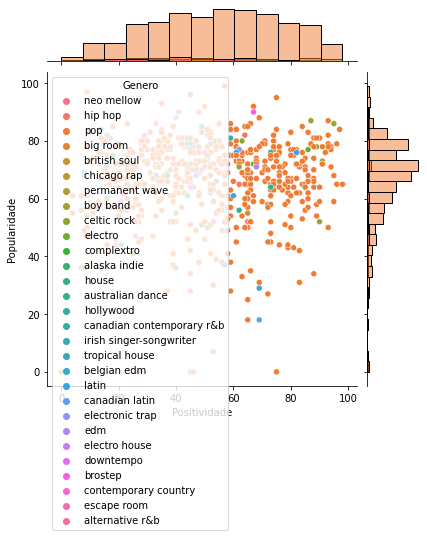

In [28]:
pospop = sns.JointGrid(data=df_songs, x="Positividade", y="Popularidade", hue = "Genero")
pospop.plot(sns.scatterplot, sns.histplot)
sns.set_palette("pastel")

In [29]:
##Visto tem muitos generos, veremos os 5 mais frequentes.
import numpy as np
np.unique(Genero)
GenPop = df_songs.groupby('Genero',as_index=False)['Nome'].count()
GenPop = GenPop.sort_values(by = 'Nome', ascending=False).head(5)

In [30]:
df_songs = df_songs.drop(df_songs[(df_songs.Genero != 'pop') & (df_songs.Genero != 'boy band') & (df_songs.Genero != 'hip hop') & (df_songs.Genero != 'british soul') & (df_songs.Genero != 'big room')].index)

Agora os três graficos

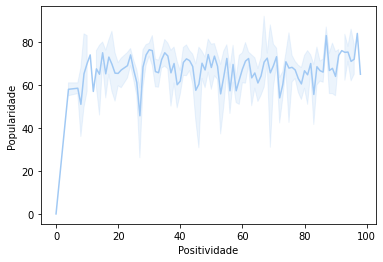

In [31]:
pospop = sns.lineplot(data=df_songs, x="Positividade", y="Popularidade")     

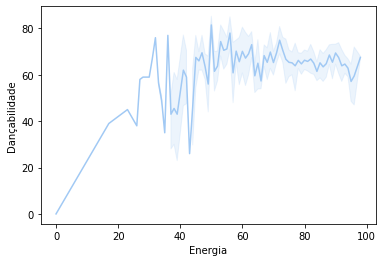

In [32]:
EnDa = sns.lineplot(data=df_songs, x="Energia", y="Dançabilidade")
sns.set_palette("hot")

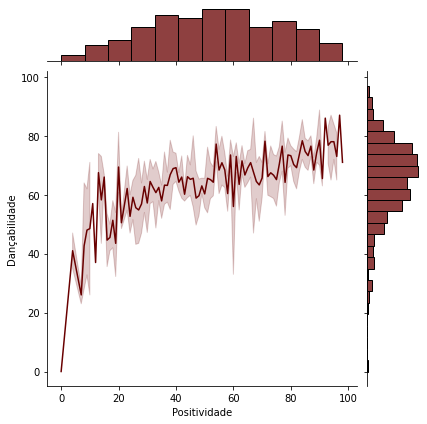

In [33]:
DanPos = sns.JointGrid(data=df_songs, x="Positividade", y="Dançabilidade")
DanPos.plot(sns.lineplot, sns.histplot)
sns.set_palette("gist_earth")

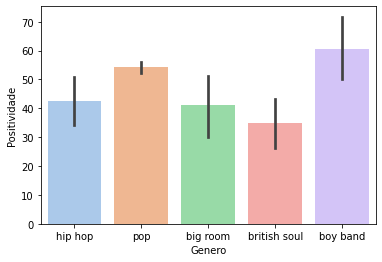

In [35]:
sns.set_palette("pastel")
GennPos = sns.barplot(data=df_songs, x="Genero", y="Positividade")

## Qual a relação entre Duração e popularidade?

Essa pergunta existiu devido à hipótese de que as músicas mais curtas eram mais populares. O grafico foi agrupado em 3 grupos. Pelo gráfico resultante, parece que a hipotese estava correta pois o grupo coma popularidade mais alta tendia a ser mais curta que as outras músicas de outros grupos.

codigo:

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
url2 = 'https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv'
df_songs = pd.read_csv(url2)

In [23]:
df_songs = df_songs[['title','artist','the genre of the track','year', 'Loudness/dB - The higher the value, the louder the song', 'Liveness - The higher the value, the more likely the song is a live recording', 'Length - The duration of the song', 'Popularity- The higher the value the more popular the song is']]
df_songs.columns = ['Name', 'Artist', 'Genre', 'Year on Top50', 'Volume/dB', 'Liveness', 'Length', 'Popularity']

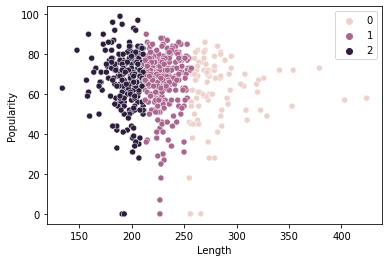

In [24]:
df_LP = df_songs[['Length', 'Popularity']]
kmeans = KMeans(init="random", n_clusters=3, random_state=0)
kmeans.fit(df_LP)

sns.scatterplot(data=df_LP, x='Length', y='Popularity', hue=kmeans.labels_)
plt.show() 

# PERGUNTAS - Beatriz:

##  Qual a relação entre popularidade e genero?

## Qual ano tem mais musicas populares?

##  Qual a relação entre a duração da musica e seu genero?


Foi observado que o ano com o maior numero de musicas populares foi 2018. o pop foi o genero com maior numero de musicas e menor media de duração também. 

In [ ]:
import pandas as pd

In [ ]:
from scipy.stats import norm

In [ ]:
import seaborn as sns 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
songs = pd.read_csv("/Users/beatr/Downloads/songs_normalize.csv")

C:\Users\beatr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


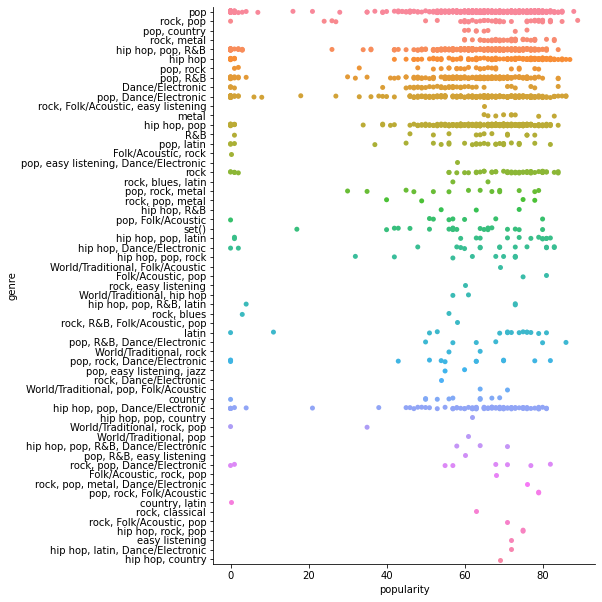

In [ ]:
sns.catplot('popularity','genre',data=songs, height=8.27)

C:\Users\beatr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


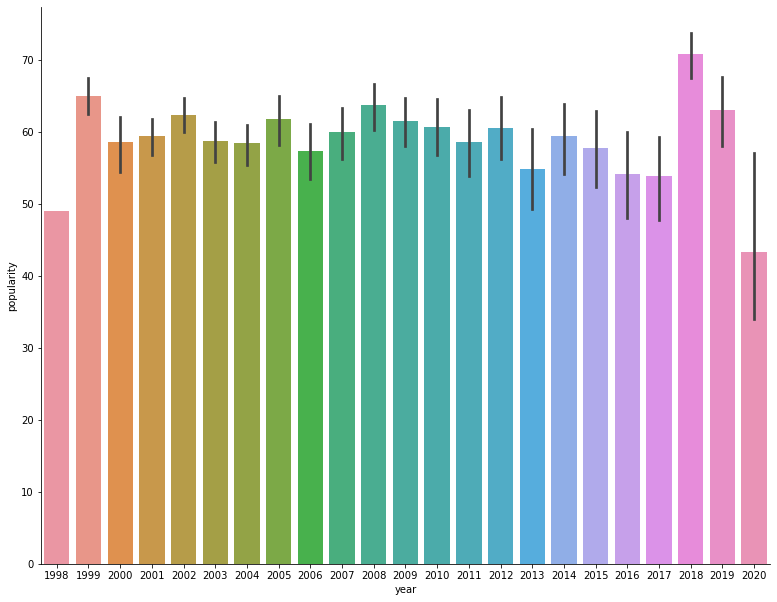

In [ ]:
sns.catplot('year','popularity',data=songs, height=8.27 , aspect=10.7/8.27, kind='bar')

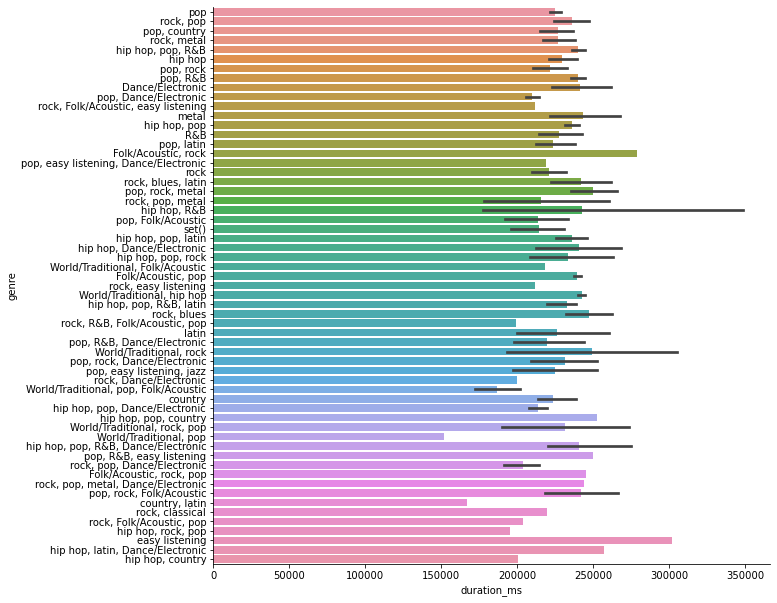

In [ ]:
sns.catplot(x='duration_ms', y='genre', data=songs, height=8.27 , aspect=10.7/8.27, kind='bar')

## Comparação de quantidade entre as musicas explicitas e não explicitas

## Timeline da quantidade de musicas explicitas

## Top 10 generos e artistas com mais musicas explicitas


([<matplotlib.patches.Wedge at 0x1ec230eea00>,
 [Text(-0.7130780864241404, 0.8375676943756167, 'musicas normais'),
  Text(0.7130780864241403, -0.8375676943756168, 'musicas explicitas')])

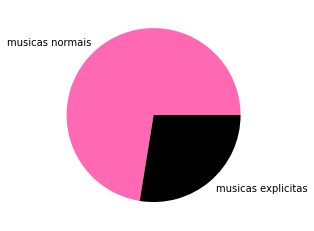

In [ ]:
musicas_normais = songs[songs.explicit == False]
a = musicas_normais.shape[0]
musicasexp = songs[songs.explicit == True]
b = musicasexp.shape[0]
grafico = np.array([a, b])
cores = ["hotpink","black"]
l = ["musicas normais", "musicas explicitas"]
plt.pie(grafico , labels = l , colors = cores)

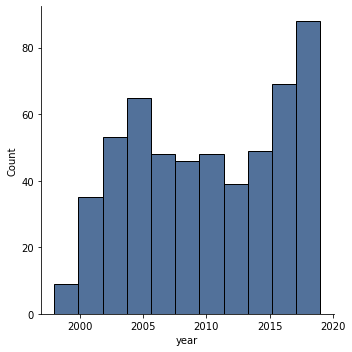

In [ ]:
sns.displot(musicasexp.query("year<2020"),x='year')
     

<AxesSubplot:>

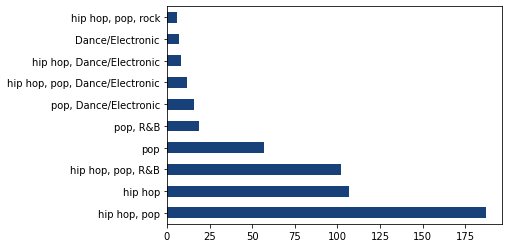

In [ ]:
musicasexp['genre'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

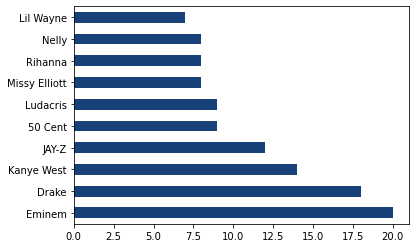

In [ ]:
musicasexp['artist'].value_counts().head(10).plot(kind='barh')

## Kmeans de:

##    Acustica e popularidade

##    Liveness e popularidade

##    Energia e popularidade 

##    Dancabilidade e popularidade

##    Positividade e popularidade

Separei em 3 grupos de forma a ficar um grupo abrigando as musicas com menor popularidade. Pelo gráfico resultante, observamos que energia e dançabilidade tem graficos parecidos, como foi exemplificado antes no projeto.

Já no grafico com a acustica pode-se observar um grupo mais concentrado de musicas com pouca acusticalidade e um bastante espalhado de musicas com muita acusticalidade. Quando fazemos com liveness temos um grafico parecido. O grafico de positividade foi o que ficou com os dados mais centralizados entre todos

<ipython-input-33-ec6b62095d27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["popularity"] = df_group["popularity"]/100


<AxesSubplot:xlabel='danceability', ylabel='popularity'>

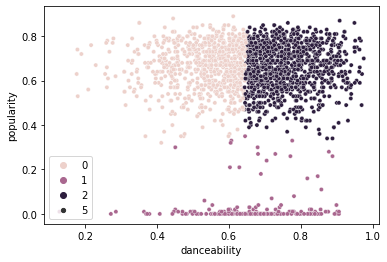

In [ ]:
df_group = songs[["danceability", "popularity" ]]
df_group["popularity"] = df_group["popularity"]/100
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="danceability", y="popularity", hue=kmeans.labels_, size = 5)

<ipython-input-34-a08033069ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["popularity"] = df_group["popularity"]/100


<AxesSubplot:xlabel='energy', ylabel='popularity'>

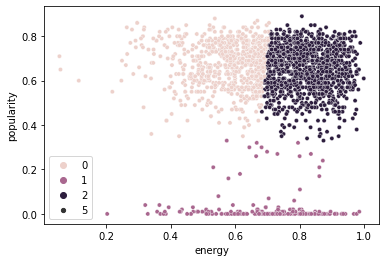

In [ ]:
df_group = songs[["energy", "popularity" ]]
df_group["popularity"] = df_group["popularity"]/100
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="energy", y="popularity", hue=kmeans.labels_, size = 5)

<ipython-input-32-c41852a86926>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["popularity"] = df_group["popularity"]/100


<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

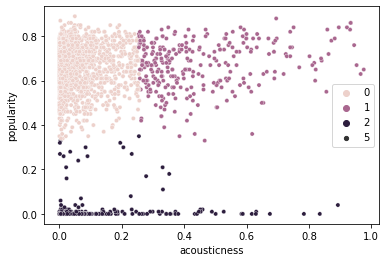

In [ ]:
df_group = songs[["acousticness", "popularity" ]]
df_group["popularity"] = df_group["popularity"]/100
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="acousticness", y="popularity", hue=kmeans.labels_, size = 5)

<ipython-input-35-82a01f70e8f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["popularity"] = df_group["popularity"]/100


<AxesSubplot:xlabel='liveness', ylabel='popularity'>

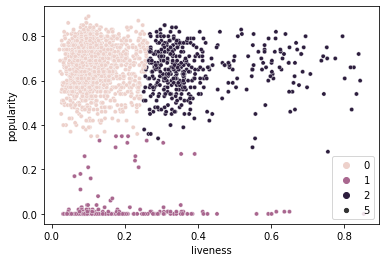

In [ ]:
df_group = songs[["liveness", "popularity" ]]
df_group["popularity"] = df_group["popularity"]/100
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="liveness", y="popularity", hue=kmeans.labels_, size = 5)

<ipython-input-36-639dd15f90a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group["popularity"] = df_group["popularity"]/100


<AxesSubplot:xlabel='valence', ylabel='popularity'>

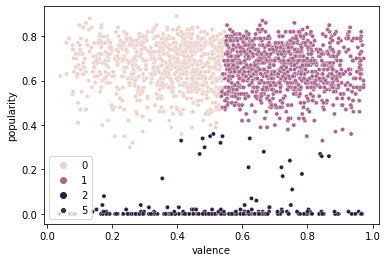

In [ ]:
df_group = songs[["valence", "popularity" ]]
df_group["popularity"] = df_group["popularity"]/100
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group)
sns.scatterplot(data=df_group, x="valence", y="popularity", hue=kmeans.labels_, size = 5)

# PERGUNTAS - Gabrielly:

##  Quais os gêneros menos escutados?

Resposta: 
    
Após a importação do csv, limitei as colunas em gênero e popularidade, utilizando "groupby" descobri a média, mediana e moda da popularidade de acordo ao gênero.

Já na descoberta das medidas de disperão, calculei a variância de popularidade, o desvio padrão e fiz um gráfico de dispersão utilizando a coluna de popularidade e dos gêneros musicais para ter uma melhor ideia sobre as medidas

Por último, fiz o boxplot utilizando as colunas anteriores.

## Calculo das medidas de Centralidade

In [ ]:
#testando o csv
import pandas as pd
songs = pd.read_csv("https://gist.githubusercontent.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893/raw/1164a139a780b0826faef36c865da65f2d3573e0/top50MusicFrom2010-2019.csv")

In [ ]:
#limitando as informações para colunas de gênero e popularidade

songs = songs.sort_values(by="Popularity- The higher the value the more popular the song is",ascending=True)[["the genre of the track", "Popularity- The higher the value the more popular the song is"]]
songs

,the genre of the track,Popularity- The higher the value the more popular the song is
50,big room,0
442,british soul,0
138,dance pop,0
362,dance pop,0
267,dance pop,0
...,...,...
576,pop,93
575,canadian pop,95
574,pop,96
573,dance pop,97


In [ ]:
#descobrindo a média da popularidade de acordo ao gêneros 

media_popularidade = songs.groupby("the genre of the track",as_index=False)["Popularity- The higher the value the more popular the song is"].mean()  
media_popularidade

,the genre of the track,Popularity- The higher the value the more popular the song is
0,acoustic pop,58.500000
1,alaska indie,36.000000
2,alternative r&b,84.000000
3,art pop,62.750000
4,atl hip hop,50.000000
5,australian dance,62.333333
6,australian hip hop,70.000000
7,australian pop,65.400000
8,barbadian pop,65.400000
9,baroque pop,67.500000


In [ ]:
#descobrir a mediana da popularidade de acordo ao gênero

mediana_populacional = songs.groupby("the genre of the track",as_index=False)["Popularity- The higher the value the more popular the song is"].median()  
mediana_populacional

,the genre of the track,Popularity- The higher the value the more popular the song is
0,acoustic pop,58.5
1,alaska indie,36.0
2,alternative r&b,84.0
3,art pop,62.5
4,atl hip hop,49.0
5,australian dance,62.5
6,australian hip hop,70.0
7,australian pop,66.0
8,barbadian pop,61.0
9,baroque pop,67.5


In [ ]:
#descobrindo a moda da popularidade de acordo ao gênero

moda_popularidade = songs.groupby("the genre of the track",as_index=False)["Popularity- The higher the value the more popular the song is"].count() #Moda
moda_popularidade

,the genre of the track,Popularity- The higher the value the more popular the song is
0,acoustic pop,2
1,alaska indie,1
2,alternative r&b,1
3,art pop,8
4,atl hip hop,5
5,australian dance,6
6,australian hip hop,1
7,australian pop,5
8,barbadian pop,15
9,baroque pop,2


## Medidas de Dispersão: variância-desvio padrão

In [ ]:
#calculando a variância

variancia_popularidade = songs["Popularity- The higher the value the more popular the song is"].var()
variancia_popularidade

210.76493501484643

In [ ]:
#calculando o desvio padrão

desviopadrao_popularidade = songs["Popularity- The higher the value the more popular the song is"].std()
desviopadrao_popularidade

14.517745521080277

C:\Users\beatr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


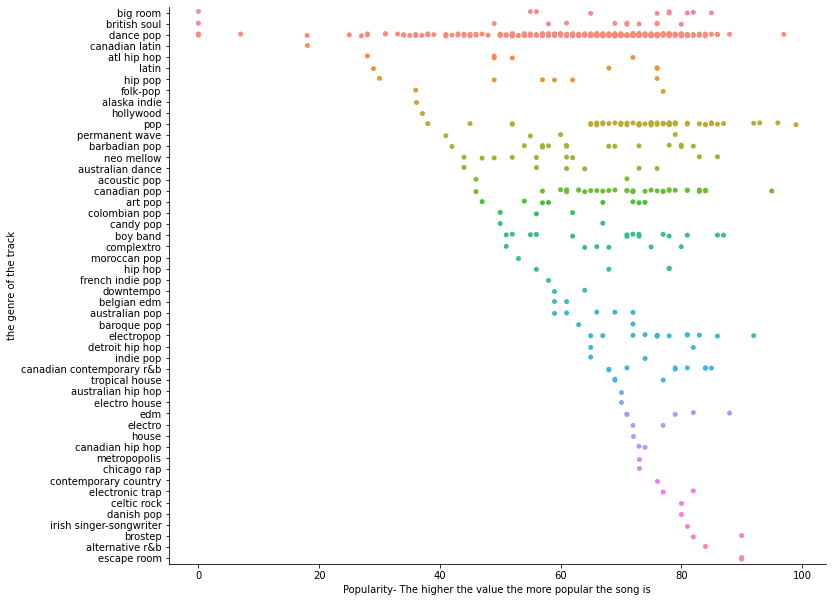

In [ ]:
#gráfico de dispersão para ter uma ideia melhor sobre as medidas de dispersão

sns.catplot("Popularity- The higher the value the more popular the song is","the genre of the track",data=songs, height=8.27 , aspect=8.7/6.27)

## Boxplots para popularidades das músicas 

<AxesSubplot:xlabel='Popularity- The higher the value the more popular the song is', ylabel='the genre of the track'>

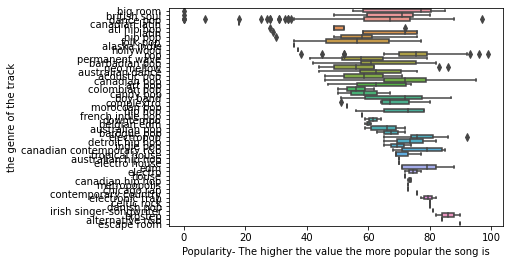

In [ ]:
boxplot = sns.boxplot(x = "Popularity- The higher the value the more popular the song is", y ="the genre of the track", data = songs )
boxplot

Concluindo assim que os gêneros menos escutados nesse período foram:

- Canadian latin
- Alaska indie  
- Hollywood  
- Atl hip hop	
- Moroccan pop	
- Hip pop	

## Quais musicas tiveram maior quantidade de tempo escutado em 2020

Sabemos que a música tem o poder de relaxar e ajudar na superação de fases difíceis, por meio dos gráficos observados, é notório que algumas músicas tiveram uma quantidade expressiva de tempo a mais escutada do que outras no período, entre elas, estão: "Blinding lights" de The Weeknd, "Mood(feat. iann dior)" de 24KGoldn e "Positions" de Ariana Grande. Já os artistas mais escutados no ano de 2020, foram: "The Weeknd", "24KGolden" e "Ariagan Grnade".

Codigo:

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/oyeoyeleye/Spotify-Song-Analysis-Classification/main/Spotify2020.csv")

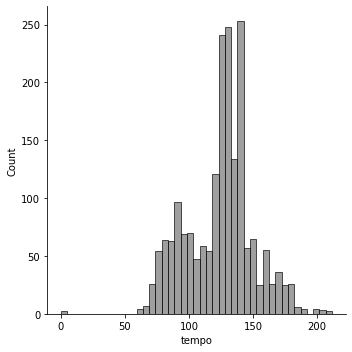

In [ ]:
sns.displot(dados.query("tempo<100000"),x='tempo',  color='#7f7f7f')

<AxesSubplot:>

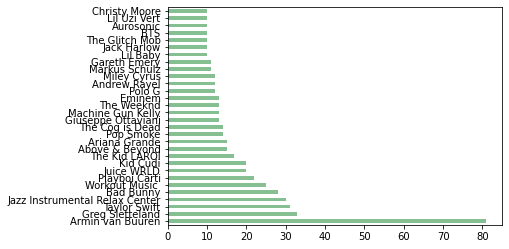

In [ ]:
dados['artist_name'].value_counts().head(30).plot(kind='barh', color='#86bf91')

<AxesSubplot:>

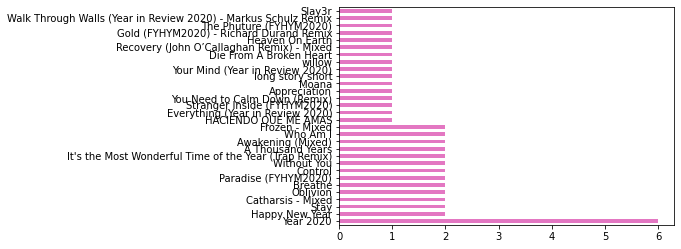

In [ ]:
dados['track_name'].value_counts().head(30).plot(kind='barh', color='#e377c2')     

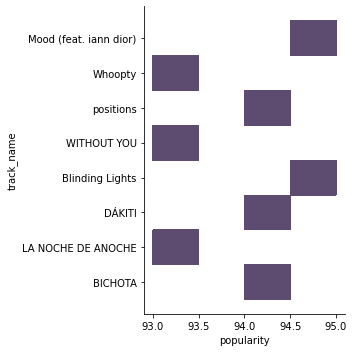

In [ ]:
sns.displot(dados.query("popularity>92"), x="popularity", y="track_name", color='#9467bd')

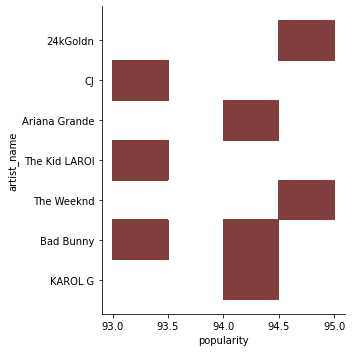

In [ ]:
sns.displot(dados.query("popularity>92"), x="popularity", y="artist_name", color='#A52A2A')

# Conclusão do projeto

Com base no apresentado, é possível perceber que mesmo aos poucos, o gosto músical das pessoas tem mudado ao longo desses 10 anos. As músicas mais populares sendo mais curtas e mais digitais(Com menos Liveness). 

As primeiras análises foram feitas acerca da popularidade com achados de que os tópicos com mais relação sáo Duração e Genero. Liveness tem uma relação inversa. Também analisamos o numero de musicas populares ao longo dos anos, assim a relação com o genero. Na analise de musicas explicitas, concluimos que representam 28% dos dados estudados e houve um crescimento em sua quantidade ao longo dos anos 

Usando o agrupamento de dados criamos uma relação entre popularidade e as seguintes colunas: Acusticalidade, Liveness, Energia, Dancabilidade e Positividade. Observamos uma semelhança entre Acusticalidade e Liveness, além de Energia e Dancabilidade

Esses resultados são importantes pois analisam o comportamento do gosto musical das pessoas(ouvintes do Spotify) ao longo dos anos e em geral, sendo a música uma forma de expressão de arte tão importante na sociedade. Vemos nessa análise alguns exemplos de mudanças que seriam um tanto quanto previsíveis, conforme a sociedade se moderniza. 

Uma limitação é que embora analisemos os dados brutos, não podemos analisar a motivação ou o significado de cada música, pois alem de ser pessoal é algo não comparável. Para trabalhos futuros, se fosse possível acho que seria bom analisar esses dados mas com divisões de idade, ver se influencia em algo. Uma melhoria seria aprender a fazer gráficos mais elaborados.

